In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [15]:
wine = load_wine()

In [34]:
x=wine.data

In [35]:
target_list = []
for i in wine.target:
    op = [0,0,0]
    op[i] = 1
    target_list.append(op)

In [36]:
y = target_list

In [37]:
scaler = MinMaxScaler()

In [38]:
x = scaler.fit_transform(x)

In [39]:
y = np.array(y)

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [41]:
def sigmoid(x):
    return (1)/(1+np.exp(-x))

In [42]:
def dsigmoid(x):
    return x*(1-x)

In [44]:
np.random.seed(3)
w0 = np.random.random((13,50))-1
w1 = np.random.random((50,26))-1
w2 = np.random.random((26,13))-1
w3 = np.random.random((13,3))-1

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1
b3 = np.random.random((1,1))-1

In [53]:
def feed_forward(data_in,w0,w1,w2,w3,b0,b1,b2,b3):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = sigmoid(np.dot(layer1,w1)+b1)
    layer3 = sigmoid(np.dot(layer2,w2)+b2)
    layer4 = sigmoid(np.dot(layer3,w3)+b3)
    
    return layer0,layer1,layer2,layer3,layer4

In [63]:
def back_propagation(layer0,layer1,layer2,layer3,layer4,actual_y,w0,w1,w2,w3,b0,b1,b2,b3,learning_rate,i):
    
    l4_error = layer4 - actual_y
    l4_delta = l4_error * dsigmoid(layer4)
    dh4 = np.dot(layer3.T,l4_delta)
    
    l3_error = np.dot(l4_delta,w3.T)
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T,l3_delta)
    
    l2_error = np.dot(l3_delta,w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T,l1_delta)
    
    w3 = w3-(learning_rate * dh4)
    w2 = w2-(learning_rate * dh3)
    w1 = w1-(learning_rate * dh2)
    w0 = w0-(learning_rate * dh1)
    
    b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
   
    if i%1==0 and (i!=0):
        loss = np.mean(np.power(layer4 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%100==0:
            print('\n',int(i),loss)
            
    return w0,w1,w2,w3,b0,b1,b2,b3
        

In [64]:
def accuracy(testx,testy):
    correct = 0
    layer0,layer1,layer2,layer3,layer4 = feed_forward(testx,w0,w1,w2,w3,b0,b1,b2,b3)
    for i in range(len(testx)):
        if np.argmax(layer4[i])==np.argmax(testy[i]):
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}"

In [65]:
epochs = 1000
loss_curve = []
iters = []

In [66]:
for i in range(epochs):
    layer0,layer1,layer2,layer3,layer4 = feed_forward(xtrain,w0,w1,w2,w3,b0,b1,b2,b3)
    w0,w1,w2,w3,b0,b1,b2,b3 = back_propagation(layer0,layer1,layer2,layer3,layer4,ytrain,w0,w1,w2,w3,b0,b1,b2,b3,0.05,i)


 100 0.13724513347515846

 200 0.136844953711749

 300 0.13649975684908444

 400 0.13619774044129151

 500 0.1359294240628648

 600 0.13568692675446914

 700 0.1354636551649211

 800 0.13525430105651284

 900 0.13505511148441893


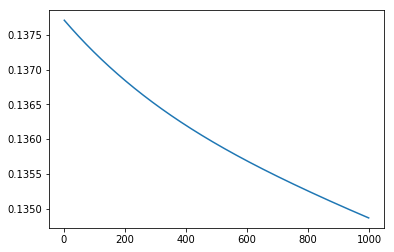

In [67]:
plt.plot(iters,loss_curve)

In [69]:
feed_forward(xtest[13],w0,w1,w2,w3,b0,b1,b2,b3)

(array([0.32105263, 0.62055336, 0.44919786, 0.40721649, 0.45652174,
        0.13793103, 0.092827  , 0.30188679, 0.23028391, 0.59129693,
        0.13821138, 0.26739927, 0.41155492]),
 array([[0.01413558, 0.01210322, 0.01388299, 0.01484407, 0.02055806,
         0.01905706, 0.03099802, 0.02121334, 0.02060367, 0.02494422,
         0.02628734, 0.02333979, 0.01979238, 0.01759639, 0.01661069,
         0.01959093, 0.01488184, 0.01412882, 0.01913941, 0.01332127,
         0.02022597, 0.01808653, 0.02444197, 0.02409643, 0.02092062,
         0.02029363, 0.02070585, 0.01408593, 0.02264529, 0.01116295,
         0.01679237, 0.0097945 , 0.01398859, 0.01498279, 0.01560393,
         0.01923216, 0.02258339, 0.01745001, 0.02395349, 0.03093348,
         0.02635337, 0.01676007, 0.02120814, 0.02276313, 0.02326745,
         0.01888864, 0.02025576, 0.01602729, 0.02503806, 0.01834227]]),
 array([[0.33695113, 0.32733081, 0.32151504, 0.32087155, 0.32130661,
         0.32788624, 0.33786247, 0.3298067 , 0.33026595,

In [70]:
ytest[13]

array([0, 0, 1])

In [72]:
accuracy(xtest,ytest)

'Accuracy: 36.111111111111114'